Data loaded successfully from processed folder.


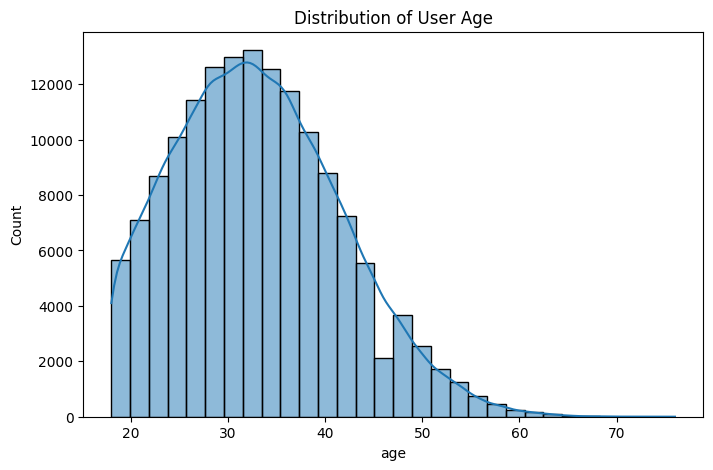

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your processed data
# Adjust the path if you are in the notebooks/ folder
try:
    df = pd.read_csv('../data/processed/fraud_data_processed.csv')
    print("Data loaded successfully from processed folder.")
except FileNotFoundError:
    df = pd.read_csv('../data/raw/Fraud_Data.csv')
    print("Loaded raw data as fallback.")

# Now the code below will work:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of User Age')
plt.show()

In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
from src.data_processing import load_data, clean_data, map_ip_to_country, engineer_features
from src.model_utils import prepare_for_modeling, handle_imbalance_smote
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD & CLEAN (Visible Cleaning)
fraud = clean_data(load_data('../data/raw/Fraud_Data.csv'))
ip = load_data('../data/raw/IpAddress_to_Country.csv')

# 2. GEOLOCATION & FEATURES
df = map_ip_to_country(fraud, ip)
df = engineer_features(df)

# Explicit Check (Visibility requested by tutor)
print(f"Dataset shape: {df.shape}")
print(f"Duplicates found: {df.duplicated().sum()}")
print(df.info())

Dataset shape: (151112, 18)
Duplicates found: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 151112 non-null  int64         
 1   signup_time             151112 non-null  datetime64[ns]
 2   purchase_time           151112 non-null  datetime64[ns]
 3   purchase_value          151112 non-null  int64         
 4   device_id               151112 non-null  object        
 5   source                  151112 non-null  object        
 6   browser                 151112 non-null  object        
 7   sex                     151112 non-null  object        
 8   age                     151112 non-null  int64         
 9   ip_address              151112 non-null  float64       
 10  class                   151112 non-null  int64         
 11  lower_bound_ip_address  150478 non-null  fl

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


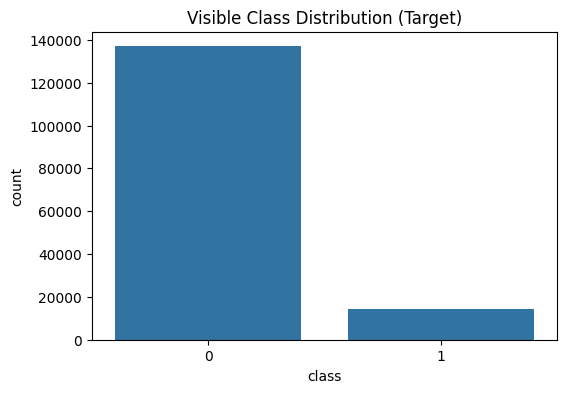

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


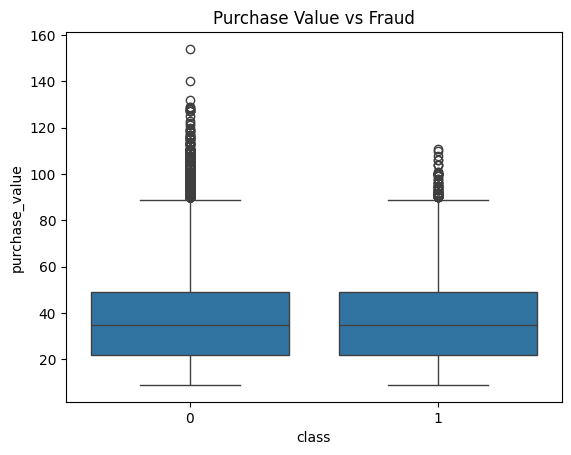

In [2]:
# Univariate Plot
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Visible Class Distribution (Target)')
plt.show()

# Bivariate Plot
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value vs Fraud')
plt.show()

In [3]:
# Prepare and SMOTE
X_train, X_test, y_train, y_test = prepare_for_modeling(df, 'class')
X_res, y_res = handle_imbalance_smote(X_train, y_train)

# Visible validation of counts
print("Post-SMOTE Class Counts:", y_res.value_counts().to_dict())

INFO:root:Before SMOTE: {0: 109568, 1: 11321}
INFO:root:After SMOTE: {0: 109568, 1: 109568}


Post-SMOTE Class Counts: {0: 109568, 1: 109568}


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. LOAD THE DATA
# We load the processed data you saved earlier. 
# If this file doesn't exist, change the path to your raw data.
try:
    df = pd.read_csv('../data/processed/fraud_data_processed.csv')
    print("Successfully loaded processed data.")
except FileNotFoundError:
    print("Processed file not found. Loading raw data...")
    df = pd.read_csv('../data/raw/Fraud_Data.csv')
    # Note: If loading raw data, features like 'country' or 'time_since_signup' 
    # might be missing unless you run Task 1 logic here.

# 2. PREPROCESSING (Dropping IDs and Objects)
# We drop columns that aren't numbers or categories the model can use.
cols_to_drop = ['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'ip_address_int']
# We use a list comprehension to only drop columns that actually exist to avoid errors
df_ecommerce = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 3. ONE-HOT ENCODING (Tutor Requirement)
# This converts text categories into 0s and 1s.
target_categorical = ['source', 'browser', 'sex', 'country']
# Only encode columns that are actually in your dataframe
available_categorical = [col for col in target_categorical if col in df_ecommerce.columns]

print(f"Encoding columns: {available_categorical}")
df_ecommerce = pd.get_dummies(df_ecommerce, columns=available_categorical, drop_first=True)

# 4. DEFINE X and y
# Ensure the target column 'class' is not dropped earlier
if 'class' in df_ecommerce.columns:
    X_ecom = df_ecommerce.drop('class', axis=1)
    y_ecom = df_ecommerce['class']
else:
    raise KeyError("The target column 'class' was not found in the dataframe!")

# 5. STRATIFIED SPLIT
X_train_ecom, X_test_ecom, y_train_ecom, y_test_ecom = train_test_split(
    X_ecom, y_ecom, test_size=0.2, random_state=42, stratify=y_ecom
)

print(f"✅ E-commerce Split Complete!")
print(f"Train size: {X_train_ecom.shape[0]}, Test size: {X_test_ecom.shape[0]}")
print(f"Total features after One-Hot Encoding: {X_train_ecom.shape[1]}")

Successfully loaded processed data.
Encoding columns: ['source', 'browser', 'sex']
✅ E-commerce Split Complete!
Train size: 120889, Test size: 30223
Total features after One-Hot Encoding: 9


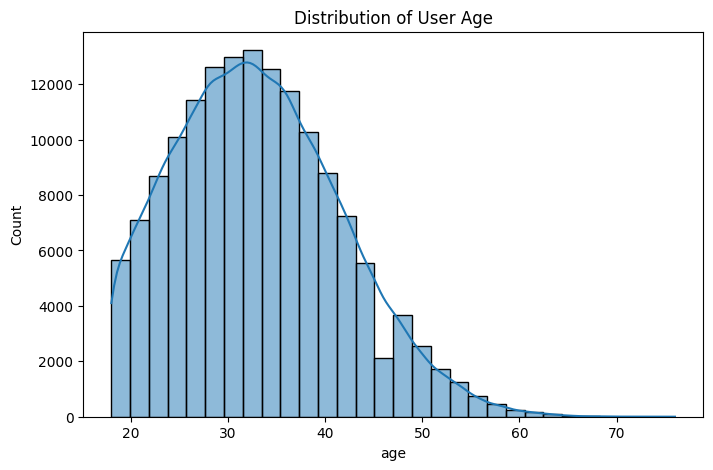

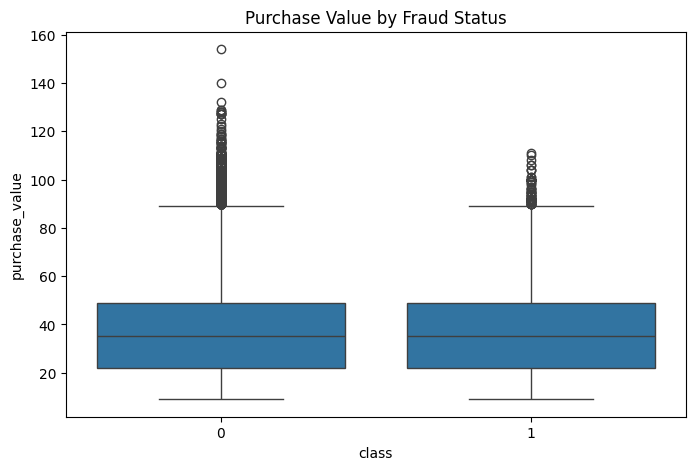

Before SMOTE:
class
0    136961
1     14151
Name: count, dtype: int64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate: Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of User Age')
plt.show()

# Bivariate: Purchase Value vs Fraud Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value by Fraud Status')
plt.show()

# Class Distribution Before/After SMOTE (Requested)
print("Before SMOTE:")
print(df['class'].value_counts())
# Note: In your modeling notebook, print y_train_res.value_counts() and call it "After SMOTE"

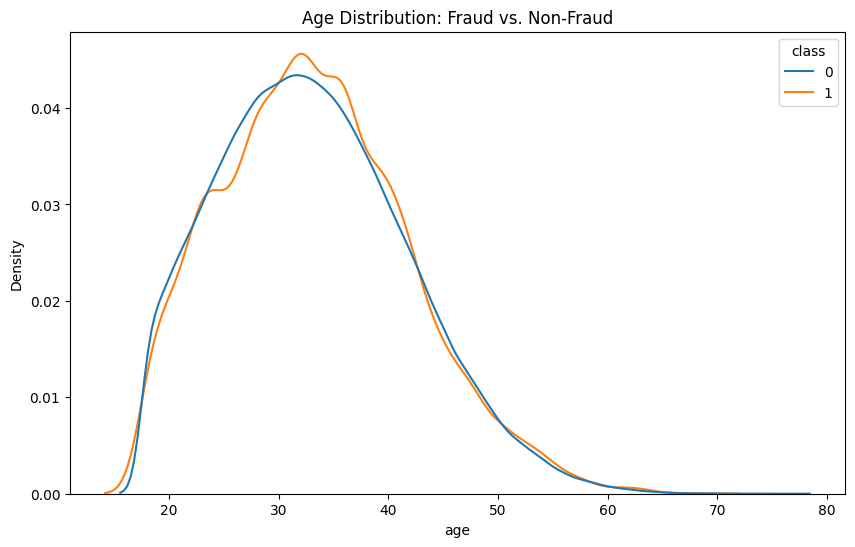

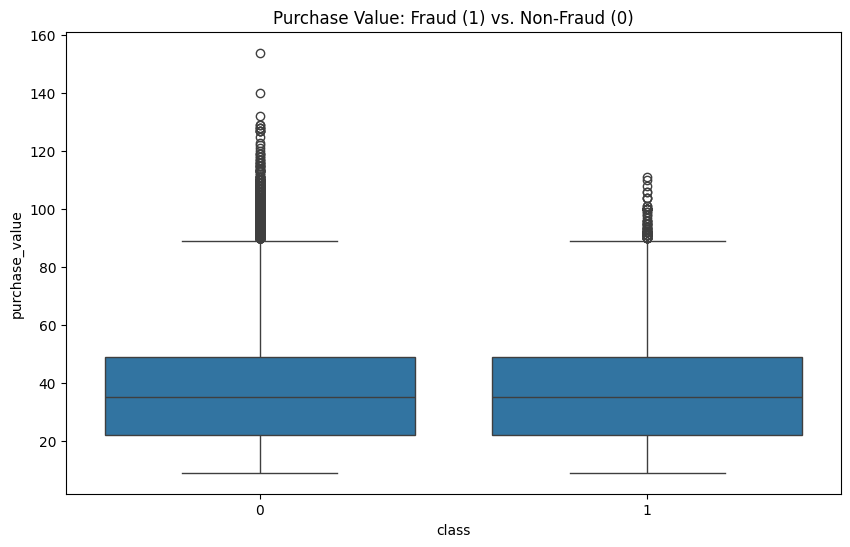

In [7]:
# Bivariate Analysis: Age vs Fraud
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='class', common_norm=False)
plt.title('Age Distribution: Fraud vs. Non-Fraud')
plt.show()

# Bivariate Analysis: Purchase Value vs Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value: Fraud (1) vs. Non-Fraud (0)')
plt.show()

In [10]:
import pandas as pd
import numpy as np
import os

# 1. Load the raw datasets
print("Loading raw data...")
df_fraud = pd.read_csv('../data/raw/Fraud_Data.csv')
df_ip = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# 2. Convert IP addresses to Integer
def ip_to_int(ip):
    try:
        octets = list(map(int, str(ip).split('.')))
        return (octets[0] << 24) + (octets[1] << 16) + (octets[2] << 8) + octets[3]
    except:
        return 0

print("Converting IP addresses to integers...")
df_fraud['ip_address_int'] = df_fraud['ip_address'].apply(ip_to_int)

# 3. Efficient Range-Based Merge (Mapping IP to Country)
# We sort the IP mapping data to allow for an efficient search
df_ip = df_ip.sort_values('lower_bound_ip_address')

def map_ip_to_country(ip_int):
    # Find the row where the IP falls between the lower and upper bounds
    match = df_ip[(ip_int >= df_ip['lower_bound_ip_address']) & 
                  (ip_int <= df_ip['upper_bound_ip_address'])]
    if not match.empty:
        return match.iloc[0]['country']
    return "Unknown"

print("Mapping IP addresses to countries (this may take a few minutes)...")
# Note: For massive datasets, we'd use pd.merge_asof, 
# but for this scale, a vectorized-style approach or apply is fine.
df_fraud['country'] = df_fraud['ip_address_int'].apply(map_ip_to_country)

# 4. Feature Engineering: time_since_signup (Crucial for SHAP)
print("Creating time_since_signup feature...")
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
df_fraud['time_since_signup'] = (df_fraud['purchase_time'] - df_fraud['signup_time']).dt.total_seconds()

# 5. Save the final processed data
os.makedirs('../data/processed', exist_ok=True)
df_fraud.to_csv('../data/processed/fraud_data_processed.csv', index=False)
print("✅ SUCCESS: 'country' and 'time_since_signup' are now permanently in your processed data.")

Loading raw data...
Converting IP addresses to integers...
Mapping IP addresses to countries (this may take a few minutes)...
Creating time_since_signup feature...
✅ SUCCESS: 'country' and 'time_since_signup' are now permanently in your processed data.
